# Classification of Arrhythmia
The Dataset used in this project is available on the UCI machine learning Repository.

* It can be found at: https://archive.ics.uci.edu/ml/datasets/Arrhythmia.

* It consists of 452 different examples spread over 16 classes. Of the 452 examples,

     * 245 are of "normal" people. We also have 12 different types of arrhythmias.
     * Among all these types of arrhythmias, the most representative are the "coronary artery disease" and "Rjgbt boundle branch block".

* We have 279 features, which include age, sex, weight, height of patients and other related information. We explicitly observe that the number of features is relatively high compared to the number of examples we are available.

* Our goal is to predict if a person is suffering from arrhythmia or not, and if **yes**, classify it in to one of 12 available groups.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import math as mt
import scipy as sp
import seaborn as sns

import matplotlib.pyplot as plt
# to avoid writing plt.show
%matplotlib inline

from sklearn.impute import SimpleImputer

pd.set_option('display.max_columns', None)

## Data Reading

In [2]:
df = pd.read_csv('/kaggle/input/arrhythmia-classification/arrhythmia.data', header= None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,?,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,?,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,?,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,5

In [4]:
df.shape

(452, 280)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452 entries, 0 to 451
Columns: 280 entries, 0 to 279
dtypes: float64(120), int64(155), object(5)
memory usage: 988.9+ KB


In [6]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
count,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.0,452.0,452.000000,452.00000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.000000,452.0,452.000000,452.000000,452.000000,452.000000,452.000000
mean,46.471239,0.550885,166.188053,68.170354,88.920354,155.1

## 1. Data Preprocessing
### Handling Missing Values

In [7]:
# Checking and counting the total number of null values

df.isnull().sum().sum()

0

When we went through the dataset we observed that out of 279 attributes, 5 Attributes have missing value in the form of '?'. Our approach is
* first replacing '?' with numpy.NAN.

In [8]:
df = df.replace('?', np.NaN)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,NaN,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,NaN,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,23,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,NaN,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0

In [9]:
df.isnull().sum().sum()

408

Text(0, 0.5, 'Total null values in each column')

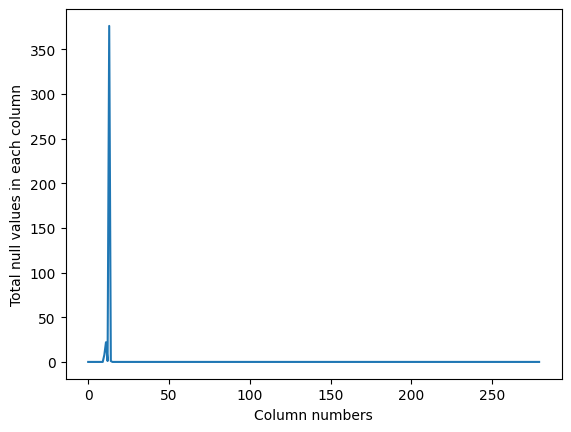

In [10]:
df.isnull().sum().plot()
plt.xlabel('Column numbers')
plt.ylabel('Total null values in each column')

Text(0, 0.5, 'Total null values in each column')

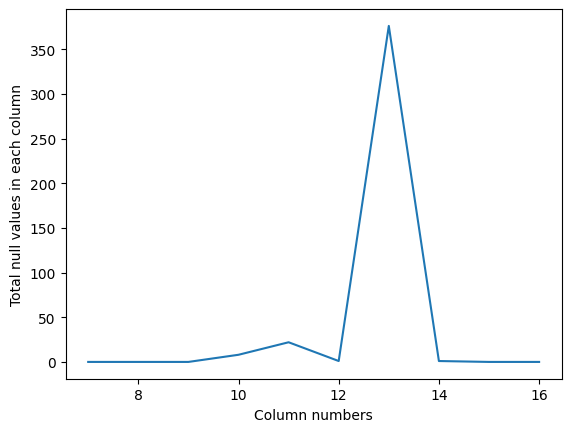

In [11]:
# zooming in the graph
df.isnull().sum()[7:17].plot(kind= 'line')
plt.xlabel('Column numbers')
plt.ylabel('Total null values in each column')

Column 13 contains more than 350 missing values out of total 452 instances. so we will drop column 13. other attributes have comparatively less null values. So instead of droping, we will replace the null value of other attributes with their mean values.

In [12]:
# Dropping column 13

df.drop(columns= 13, inplace= True)

In [13]:
new_df = df.copy()
new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75,0,190,80,91,193,371,174,121,-16,13,64,-2,63,0,52,44,0,0,32,0,0,0,0,0,0,0,44,20,36,0,28,0,0,0,0,0,0,52,40,0,0,0,60,0,0,0,0,0,0,52,0,0,0,0,0,0,0,0,0,0,0,0,56,36,0,0,32,0,0,0,0,0,0,48,32,0,0,0,56,0,0,0,0,0,0,80,0,0,0,0,0,0,0,0,0,0,0,0,40,52,0,0,28,0,0,0,0,0,0,0,48,48,0,0,32,0,0,0,0,0,0,0,52,52,0,0,36,0,0,0,0,0,0,0,52,48,0,0,32,0,0,0,0,0,0,0,56,44,0,0,32,0,0,0,0,0,0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8
1,56,1,165,64,81,174,401,149,39,25,37,-17,31,53,0,48,0,0,0,24,0,0,0,0,0,0,0,64,0,0,0,24,0,0,0,0,0,0,32,24,0,0,0,40,0,0,0,0,0,0,48,0,0,0,0,0,0,0,0,0,0,0,0,44,20,0,0,24,0,0,0,0,0,0,0,60,0,0,0,20,0,0,0,0,0,0,0,24,52,0,0,16,0,0,0,0,0,0,0,32,52,0,0,20,0,0,0,0,0,0,0,44,48,0,0,32,0,0,0,0,0,0,0,48,44,0,0,32,0,0,0,0,0,0,0,48,40,0,0,28,0,0,0,0,0,0,0,48,0,0,0,28,0,0,0,0,0,0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6
2,54,0,172,95,138,163,386,185,102,96,34,70,66,75,0,40,80,0,0,24,0,0,0,0,0,0,20,56,52,0,0,40,0,0,0,0,0,0,28,116,0,0,0,52,0,0,0,0,0,0,52,64,0,0,0,88,0,0,0,0,0,0,0,36,92,0,0,24,0,0,0,0,0,0,0,128,0,0,0,24,0,1,0,0,0,0,0,24,36,76,0,100,0,0,0,0,0,0,0,40,28,60,0,96,0,0,0,0,0,0,0,48,20,56,24,32,0,0,0,0,0,0,0,44,88,0,0,28,0,0,0,0,0,0,0,44,76,0,0,28,0,0,0,0,0,0,0,44,72,0,0,24,0,0,0,0,0,0,1.0,0.0,4.5,-2.8,0.0,0.0,0.3,2.5,-2.2,19.8,0.8,-0.4,6.4,-1.3,0.0,0.0,0.7,2.7,14.2,37.9,-0.2,-0.6,4.4,0.0,0.0,0.0,0.5,0.2,24.7,26.2,-1.0,-5.3,1.8,0.0,0.0,0.0,-0.5,-2.5,-8.0,-28.5,0.5,0.0,1.7,-2.7,0.0,0.0,-0.2,1.0,-9.4,-1.2,0.4,0.0,4.9,0.0,0.0,0.0,0.6,1.4,31.3,42.7,-0.8,0.0,0.7,-3.8,6.5,0.0,0.3,-3.3,18.7,-13.6,-0.9,0.0,2.2,-4.1,7.4,0.0,0.5,-2.4,20.9,-2.6,0.0,0.0,5.8,-4.1,4.0,-0.5,0.4,0.3,20.4,23.3,0.7,0.0,10.0,-5.7,0.0,0.0,0.5,2.2,-3.0,20.7,1.3,0.0,11.1,-3.4,0.0,0.0,0.4,3.4,11.5,48.2,0.9,0.0,9.5,-2.4,0.0,0.0,0.3,3.4,12.3,49.0,10
3,55,0,175,94,100,202,380,179,143,28,11,-5,20,71,0,72,20,0,0,48,0,0,0,0,0,0,0,64,36,0,0,36,0,0,0,0,0,0,20,52,48,0,0,56,0,0,0,0,0,0,64,32,0,0,0,72,0,0,0,0,0,0,0,60,12,0,0,44,0,0,0,0,0,0,0,60,44,0,0,32,0,0,0,0,0,0,56,0,0,0,0,0,0,0,0,0,0,0,0,40,44,0,0,20,0,0,0,0,0,0,0,52,40,0,0,32,

In [14]:
# make new columns indicating what will be imputed

cols_with_missing = (col for col in new_df.columns
                    if new_df[col].isnull().any())

for col in cols_with_missing:
    new_df[col] = new_df[col].isnull()

In [15]:
# Imputation

imputer = SimpleImputer()
new_df = pd.DataFrame(imputer.fit_transform(new_df))

new_df.columns = df.columns

new_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,0.0,0.0,0.0,0.0,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,36.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,40.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,36.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,32.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,52.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,24.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,52.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,52.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7.7,0.0,0.0,0.9,3.8,-5.7,27.7,-0.2,0.0,9.5,-5.0,0.0,0.0,0.5,2.6,11.8,34.6,-0.4,0.0,11.0,-2.4,0.0,0.0,0.4,2.6,21.6,43.4,-0.5,0.0,8.5,0.0,0.0,0.0,0.2,2.1,20.4,38.8,6.0
2,54.0,0.0,172.0,95.0,138.0,163.0,386.0,185.0,102.0,96.0,0.0,0.0,0.0,0.0,0.0,40.0,80.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,20.0,56.0,52.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,28.0,116.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,64.0,0.0,0.0,0.0,88.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,36.0,92.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,0.0,0.0,0.0,24.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,24.0,36.0,76.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,28.0,60.0,0.0,96.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,20.0,56.0,24.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,88.0,0.0,0.0,28.0

In [16]:
new_df.isnull().sum().sum()

0

### Generating Final Dataset

In [17]:
#Creating column names

final_df_columns=["Age","Sex","Height","Weight","QRS_Dur",
"P-R_Int","Q-T_Int","T_Int","P_Int","QRS","T","P","J","Heart_Rate",
"Q_Wave","R_Wave","S_Wave","R'_Wave","S'_Wave","Int_Def","Rag_R_Nom",
"Diph_R_Nom","Rag_P_Nom","Diph_P_Nom","Rag_T_Nom","Diph_T_Nom", 
"DII00", "DII01","DII02", "DII03", "DII04","DII05","DII06","DII07","DII08","DII09","DII10","DII11",
"DIII00","DIII01","DIII02", "DIII03", "DIII04","DIII05","DIII06","DIII07","DIII08","DIII09","DIII10","DIII11",
"AVR00","AVR01","AVR02","AVR03","AVR04","AVR05","AVR06","AVR07","AVR08","AVR09","AVR10","AVR11",
"AVL00","AVL01","AVL02","AVL03","AVL04","AVL05","AVL06","AVL07","AVL08","AVL09","AVL10","AVL11",
"AVF00","AVF01","AVF02","AVF03","AVF04","AVF05","AVF06","AVF07","AVF08","AVF09","AVF10","AVF11",
"V100","V101","V102","V103","V104","V105","V106","V107","V108","V109","V110","V111",
"V200","V201","V202","V203","V204","V205","V206","V207","V208","V209","V210","V211",
"V300","V301","V302","V303","V304","V305","V306","V307","V308","V309","V310","V311",
"V400","V401","V402","V403","V404","V405","V406","V407","V408","V409","V410","V411",
"V500","V501","V502","V503","V504","V505","V506","V507","V508","V509","V510","V511",
"V600","V601","V602","V603","V604","V605","V606","V607","V608","V609","V610","V611",
"JJ_Wave","Amp_Q_Wave","Amp_R_Wave","Amp_S_Wave","R_Prime_Wave","S_Prime_Wave","P_Wave","T_Wave",
"QRSA","QRSTA","DII170","DII171","DII172","DII173","DII174","DII175","DII176","DII177","DII178","DII179",
"DIII180","DIII181","DIII182","DIII183","DIII184","DIII185","DIII186","DIII187","DIII188","DIII189",
"AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199",
"AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209",
"AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219",
"V1220","V1221","V1222","V1223","V1224","V1225","V1226","V1227","V1228","V1229",
"V2230","V2231","V2232","V2233","V2234","V2235","V2236","V2237","V2238","V2239",
"V3240","V3241","V3242","V3243","V3244","V3245","V3246","V3247","V3248","V3249",
"V4250","V4251","V4252","V4253","V4254","V4255","V4256","V4257","V4258","V4259",
"V5260","V5261","V5262","V5263","V5264","V5265","V5266","V5267","V5268","V5269",
"V6270","V6271","V6272","V6273","V6274","V6275","V6276","V6277","V6278","V6279","class"]

In [18]:
#Adding Column names to dataset

new_df.columns=final_df_columns
new_df.to_csv("new data with target class.csv")
new_df.head()

,Age,Sex,Height,Weight,QRS_Dur,P-R_Int,Q-T_Int,T_Int,P_Int,QRS,T,P,J,Heart_Rate,Q_Wave,R_Wave,S_Wave,R'_Wave,S'_Wave,Int_Def,Rag_R_Nom,Diph_R_Nom,Rag_P_Nom,Diph_P_Nom,Rag_T_Nom,Diph_T_Nom,DII00,DII01,DII02,DII03,DII04,DII05,DII06,DII07,DII08,DII09,DII10,DII11,DIII00,DIII01,DIII02,DIII03,DIII04,DIII05,DIII06,DIII07,DIII08,DIII09,DIII10,DIII11,AVR00,AVR01,AVR02,AVR03,AVR04,AVR05,AVR06,AVR07,AVR08,AVR09,AVR10,AVR11,AVL00,AVL01,AVL02,AVL03,AVL04,AVL05,AVL06,AVL07,AVL08,AVL09,AVL10,AVL11,AVF00,AVF01,AVF02,AVF03,AVF04,AVF05,AVF06,AVF07,AVF08,AVF09,AVF10,AVF11,V100,V101,V102,V103,V104,V105,V106,V107,V108,V109,V110,V111,V200,V201,V202,V203,V204,V205,V206,V207,V208,V209,V210,V211,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V400,V401,V402,V403,V404,V405,V406,V407,V408,V409,V410,V411,V500,V501,V502,V503,V504,V505,V506,V507,V508,V509,V510,V511,V600,V601,V602,V603,V604,V605,V606,V607,V608,V609,V610,V611,JJ_Wave,Amp_Q_Wave,Amp_R_Wave,Amp_S_Wave,R_Prime_Wave,S_Prime_Wave,P_Wave,T_Wave,QRSA,QRSTA,DII170,DII171,DII172,DII173,DII174,DII175,DII176,DII177,DII178,DII179,DIII180,DIII181,DIII182,DIII183,DIII184,DIII185,DIII186,DIII187,DIII188,DIII189,AVR190,AVR191,AVR192,AVR193,AVR194,AVR195,AVR196,AVR197,AVR198,AVR199,AVL200,AVL201,AVL202,AVL203,AVL204,AVL205,AVL206,AVL207,AVL208,AVL209,AVF210,AVF211,AVF212,AVF213,AVF214,AVF215,AVF216,AVF217,AVF218,AVF219,V1220,V1221,V1222,V1223,V1224,V1225,V1226,V1227,V1228,V1229,V2230,V2231,V2232,V2233,V2234,V2235,V2236,V2237,V2238,V2239,V3240,V3241,V3242,V3243,V3244,V3245,V3246,V3247,V3248,V3249,V4250,V4251,V4252,V4253,V4254,V4255,V4256,V4257,V4258,V4259,V5260,V5261,V5262,V5263,V5264,V5265,V5266,V5267,V5268,V5269,V6270,V6271,V6272,V6273,V6274,V6275,V6276,V6277,V6278,V6279,class
0,75.0,0.0,190.0,80.0,91.0,193.0,371.0,174.0,121.0,-16.0,0.0,0.0,0.0,0.0,0.0,52.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,36.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,40.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,36.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,32.0,0.0,0.0,0.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,80.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40.0,52.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,52.0,0.0,0.0,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,52.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.2,0.0,6.1,-1.0,0.0,0.0,0.6,2.1,13.6,30.8,0.0,0.0,1.7,-1.0,0.6,0.0,1.3,1.5,3.7,14.5,0.1,-5.2,1.4,0.0,0.0,0.0,0.8,-0.6,-10.7,-15.6,0.4,-3.9,0.0,0.0,0.0,0.0,-0.8,-1.7,-10.1,-22.0,0.0,0.0,5.7,-1.0,0.0,0.0,-0.1,1.2,14.1,22.5,0.0,-2.5,0.8,0.0,0.0,0.0,1.0,0.4,-4.8,-2.7,0.1,-6.0,0.0,0.0,0.0,0.0,-0.8,-0.6,-24.0,-29.7,0.0,0.0,2.0,-6.4,0.0,0.0,0.2,2.9,-12.6,15.2,-0.1,0.0,8.4,-10.0,0.0,0.0,0.6,5.9,-3.9,52.7,-0.3,0.0,15.2,-8.4,0.0,0.0,0.9,5.1,17.7,70.7,-0.4,0.0,13.5,-4.0,0.0,0.0,0.9,3.9,25.5,62.9,-0.3,0.0,9.0,-0.9,0.0,0.0,0.9,2.9,23.3,49.4,8.0
1,56.0,1.0,165.0,64.0,81.0,174.0,401.0,149.0,39.0,25.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64.0,0.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,24.0,0.0,0.0,0.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,20.0,0.0,0.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.0,52.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,52.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,48.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,44.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,40.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,48.0,0.0,0.0,0.0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.6,0.0,7.2,0.0,0.0,0.0,0.4,1.5,17.2,26.5,0.0,0.0,5.5,0.0,0.0,0.0,0.1,1.7,17.6,29.5,0.3,-1.6,0.9,0.0,0.0,0.0,-0.3,0.4,-1.5,1.3,0.1,-6.4,0.0,0.0,0.0,0.0,-0.3,-1.6,-15.3,-25.5,-0.3,0.0,4.2,-0.9,0.0,0.0,0.4,0.7,8.3,12.3,0.2,0.0,2.2,0.0,0.0,0.0,-0.2,0.8,6.6,11.7,0.4,0.0,1.0,-8.8,0.0,0.0,0.5,-0.6,-21.6,-26.8,0.4,0.0,2.6,-7.9,0.0,0.0,0.8,2.0,-16.4,1.2,0.0,0.0,5.8,-7

In [19]:
target=new_df["class"]

final_df = new_df.drop(columns ="class")

In [20]:
final_df.shape

(452, 278)

## 2. Exploratory Data Analysis (EDA)

In [21]:
#List with class names

class_names = ["Normal", 
               "Ischemic changes (CAD)", 
               "Old Anterior Myocardial Infraction",
               "Old Inferior Myocardial Infraction",
               "Sinus tachycardy", 
               "Sinus bradycardy", 
               "Ventricular Premature Contraction (PVC)",
               "Supraventricular Premature Contraction",
               "Left Boundle branch block",
               "Right boundle branch block",
               "1.Degree AtrioVentricular block",
               "2.Degree AV block",
               "3.Degree AV block",
               "Left Ventricule hypertrophy",
               "Atrial Fibrillation or Flutter",
               "Others"]

In [22]:
t= new_df.sort_values(by= ['class'])

In [23]:
la = t['class'].value_counts(sort= False).tolist()

la

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 4, 5, 22]

<Axes: xlabel='class', ylabel='count'>

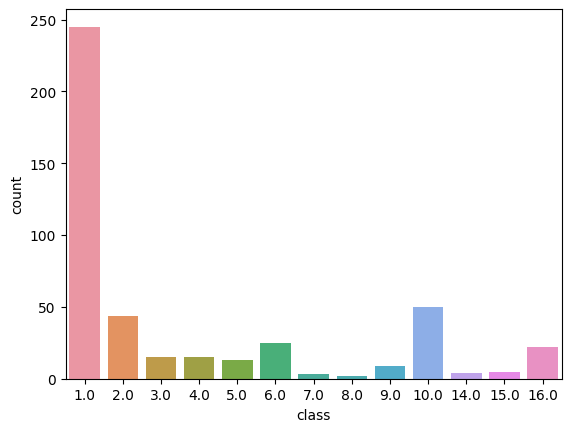

In [24]:
sns.countplot(x= 'class', data= new_df)

In [25]:
values = la[0:10]
values.extend([0,0,0])
values.extend(la[10:13])
print(values)

[245, 44, 15, 15, 13, 25, 3, 2, 9, 50, 0, 0, 0, 4, 5, 22]


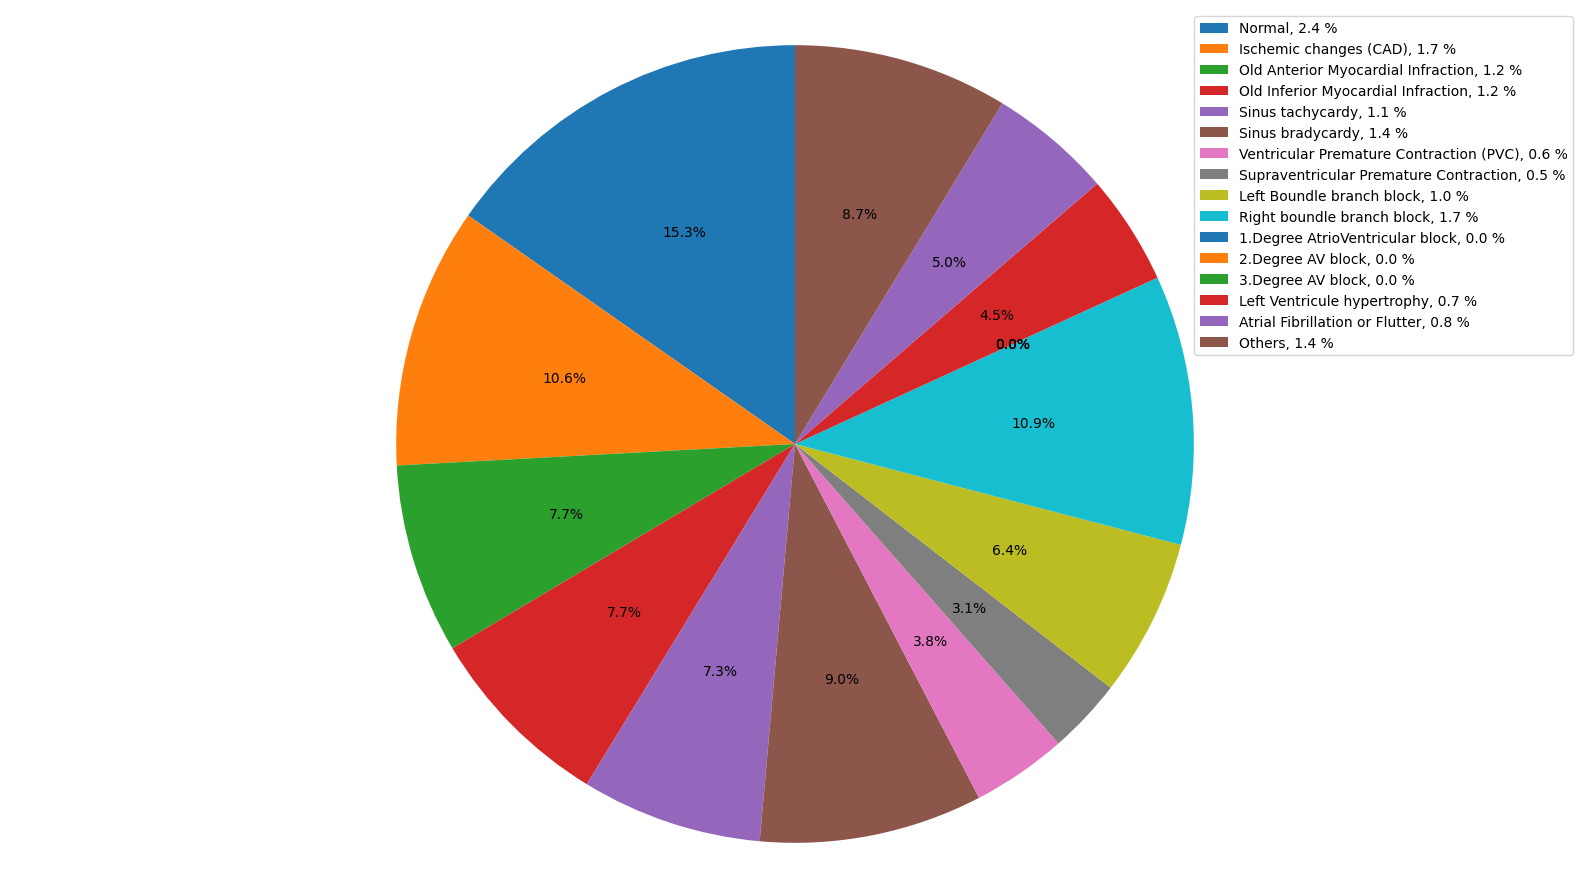

In [26]:
labels = class_names
Log_Norm = []
for i in values:
    Log_Norm.append(mt.log10(i+1))
fig1, ax1 = plt.subplots(figsize=(16,9))
patches = plt.pie(Log_Norm, autopct='%1.1f%%', startangle=90)

leg = plt.legend( loc = 'best', labels=['%s, %1.1f %%' % (l, s) for l, s in zip(labels, Log_Norm)])
plt.axis('equal')

for text in leg.get_texts():
    plt.setp(text, color = 'Black')
plt.tight_layout()
plt.show()

We found that Of the 452 examples, 245 are of class A which refers to "normal" people. We also have 12 different types of arrhythmias and 3 other type of arrthmias are not present in our dataset.

### Handling Outliers & Data Visualization

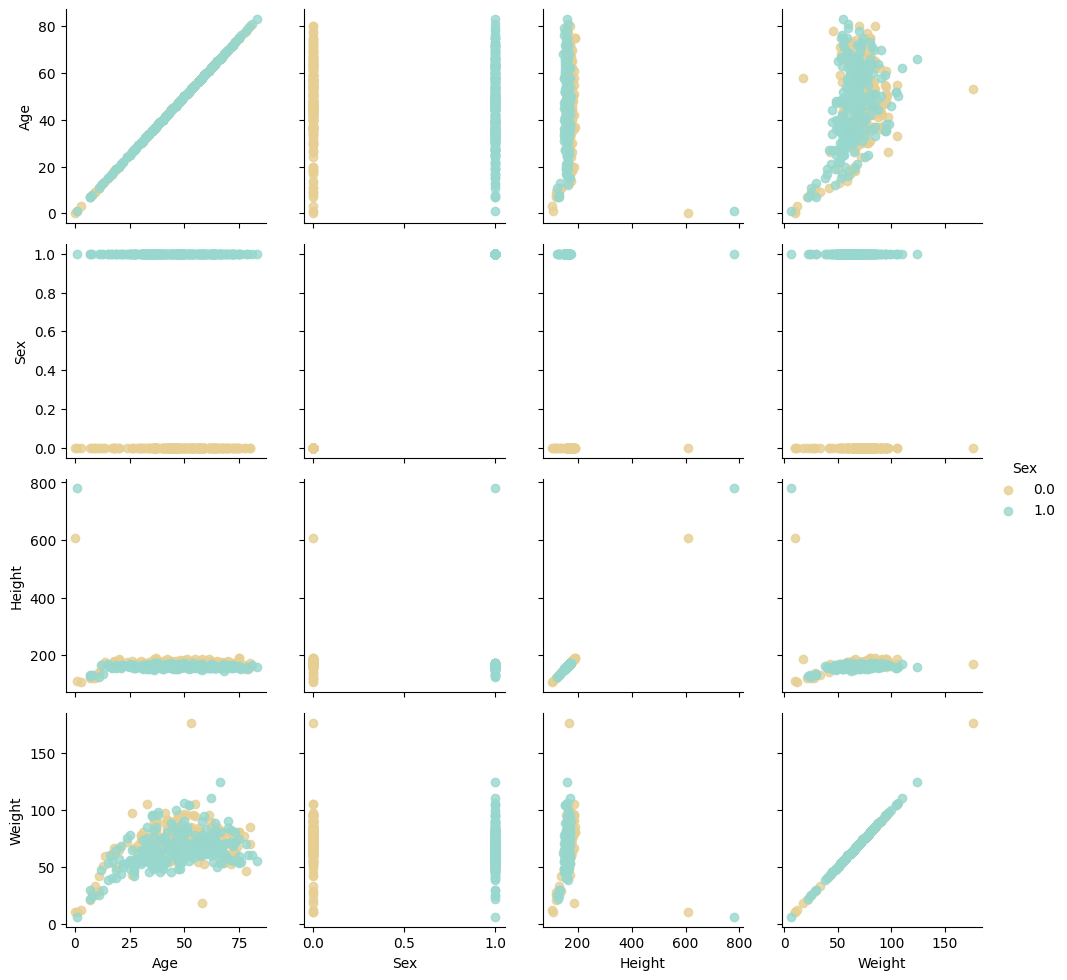

In [27]:
# looking for pairwise relationships and outliers

g = sns.PairGrid(final_df, vars=['Age', 'Sex', 'Height', 'Weight'],hue='Sex', palette='BrBG')
g.map(plt.scatter, alpha=0.8)
g.add_legend();

According to scatter plots, there are few outliers in 'height' and 'weight' attributes.check the maximums of heights and weights

In [28]:
sorted(final_df['Height'], reverse=True)[:10]

[780.0, 608.0, 190.0, 190.0, 190.0, 188.0, 186.0, 186.0, 186.0, 185.0]

The tallest person ever lived in the world was 272 cm (1940). His followers were 267 cm(1905) and 263.5 cm(1969). Replacing 780 and 608 with 180 and 108 cm respectively

In [29]:
final_df['Height']=final_df['Height'].replace(608,108)
final_df['Height']=final_df['Height'].replace(780,180)

In [30]:
sorted(final_df['Weight'], reverse=True)[:10]

[176.0, 124.0, 110.0, 106.0, 105.0, 105.0, 104.0, 104.0, 100.0, 98.0]

<Axes: >

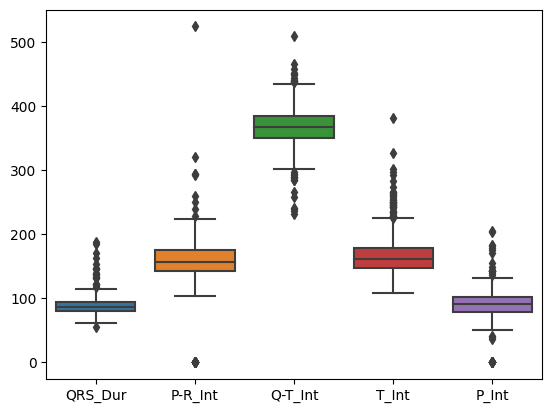

In [31]:
sns.boxplot(data=final_df[["QRS_Dur","P-R_Int","Q-T_Int","T_Int","P_Int"]])

PR interval is the period, measured in milliseconds, that extends from the beginning of the P wave until the beginning of the QRS complex; it is normally between 120 and 200ms in duration.

Text(0, 0.5, 'Count')

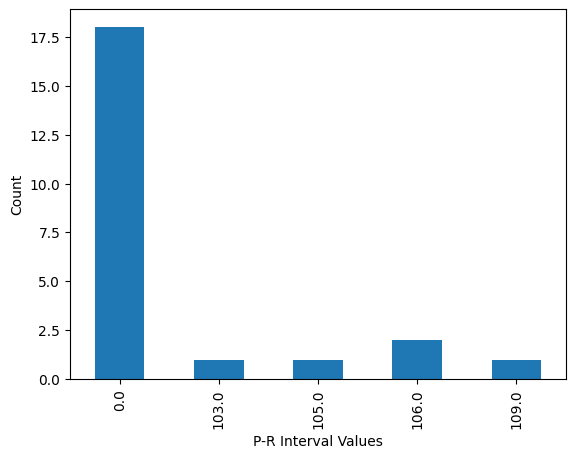

In [32]:
final_df['P-R_Int'].value_counts().sort_index().head().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

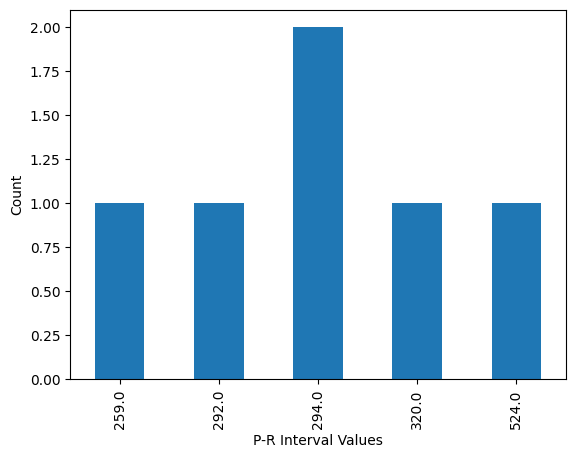

In [33]:
final_df['P-R_Int'].value_counts().sort_index().tail().plot(kind='bar')
plt.xlabel('P-R Interval Values')
plt.ylabel('Count')

<Axes: >

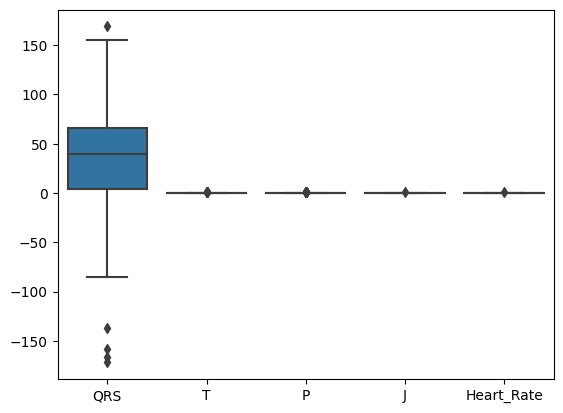

In [34]:
sns.boxplot(data=final_df[["QRS","T","P","J","Heart_Rate"]])

<Axes: >

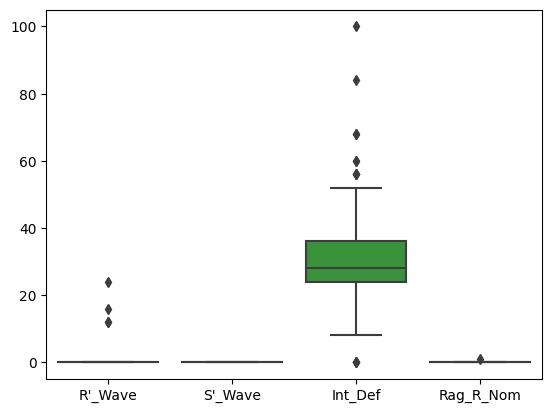

In [35]:
sns.boxplot(data=final_df[["R'_Wave","S'_Wave","Int_Def","Rag_R_Nom"]])

In [36]:
final_df["S'_Wave"].value_counts().sort_index(ascending=False)

S'_Wave
0.0    452
Name: count, dtype: int64

In [37]:
final_df["V101"].value_counts().sort_index(ascending=False)

V101
216.0     1
112.0     1
84.0      1
72.0      1
68.0      1
64.0      1
48.0      6
44.0      6
40.0     13
36.0     36
32.0     63
28.0     81
24.0     88
20.0     57
16.0     13
12.0      4
0.0      79
Name: count, dtype: int64

In [38]:
final_df["V201"].value_counts().sort_index(ascending=False)

V201
216.0     1
136.0     1
84.0      1
72.0      1
60.0      5
56.0      4
52.0     12
48.0     19
44.0     53
40.0     68
36.0     74
32.0     69
28.0     48
24.0     39
20.0     15
16.0      6
12.0      2
0.0      34
Name: count, dtype: int64

In [39]:
final_df["V301"].value_counts().sort_index(ascending=False)

V301
132.0     1
88.0      2
76.0      2
72.0      1
68.0      2
64.0      3
60.0     16
56.0     26
52.0     57
48.0     68
44.0     76
40.0     74
36.0     49
32.0     32
28.0     13
24.0      4
20.0      6
16.0      1
0.0      19
Name: count, dtype: int64

In [40]:
final_df["V501"].value_counts().sort_index(ascending=False)

V501
136.0      1
120.0      2
116.0      1
108.0      1
96.0       1
92.0       1
84.0       1
76.0       2
72.0       3
68.0       4
64.0       5
60.0       9
56.0      22
52.0      67
48.0     105
44.0     104
40.0      73
36.0      29
32.0      12
28.0       3
24.0       2
20.0       1
0.0        3
Name: count, dtype: int64

<Axes: >

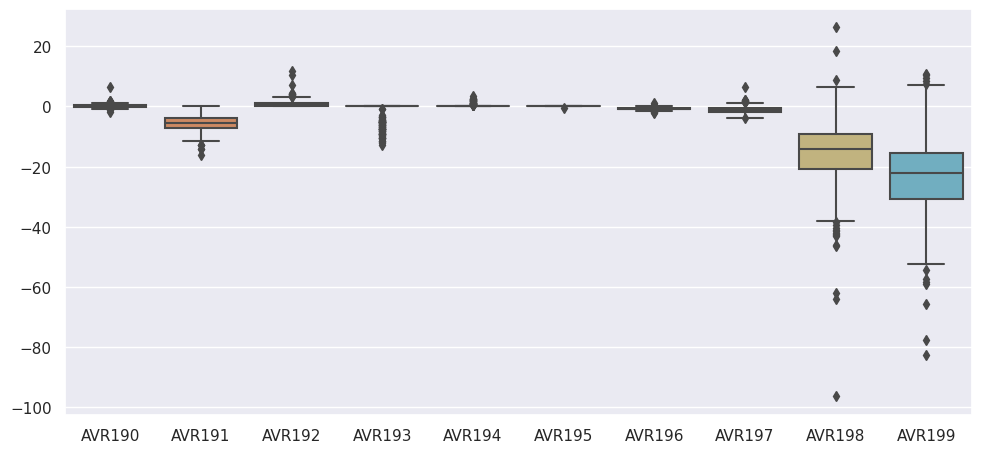

In [41]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVR190","AVR191","AVR192","AVR193","AVR194","AVR195","AVR196","AVR197","AVR198","AVR199"]])

<Axes: >

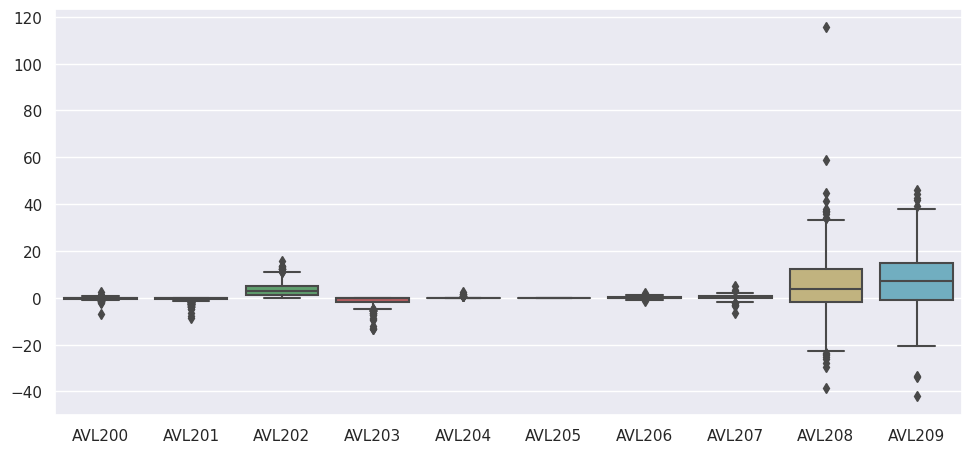

In [42]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVL200","AVL201","AVL202","AVL203","AVL204","AVL205","AVL206","AVL207","AVL208","AVL209"]])

<Axes: >

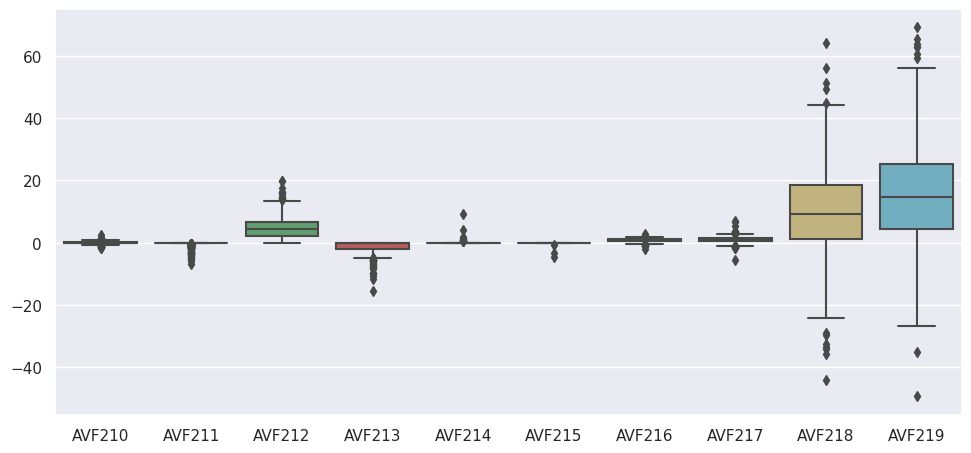

In [43]:
sns.set(rc={'figure.figsize':(11.7,5.27)})
sns.boxplot(data=final_df[["AVF210","AVF211","AVF212","AVF213","AVF214","AVF215","AVF216","AVF217","AVF218","AVF219"]])

### Feature Scaling and Splitting dataset

In [44]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(final_df, target, test_size= 0.2, random_state= 42)

In [45]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

## 3. Modeling

In [46]:
# Importing evaluation metrics

from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, recall_score, precision_score, confusion_matrix, classification_report

# We will store result of each model

result = pd.DataFrame(columns= ['Model', 'Train Accuracy', 'Test_Accuracy'])

### KNN Classifier

In [47]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [48]:
knn_train_accuracy = accuracy_score(y_train, knn.predict(x_train))
knn_test_accuracy = accuracy_score(y_test, knn.predict(x_test))
knn_train_recall = recall_score(y_train, knn.predict(x_train),average="weighted")
knn_test_recall = recall_score(y_test, knn.predict(x_test),average="weighted")

In [49]:
print('Train Recall score: {}'
      .format(knn_train_recall))
print('Test Recall score: {}'
      .format(knn_test_recall))
confusion_matrix(y_test, y_pred)

Train Recall score: 0.6509695290858726
Test Recall score: 0.5274725274725275


array([[43,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [13,  0,  0,  0,  1,  0,  0,  0,  2,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 4,  2,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0]])

In [50]:
new_row = pd.DataFrame([{'Model': 'KNN Classifier', 'Train Accuracy': knn_train_accuracy, 'Test_Accuracy': knn_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

            Model  Train Accuracy  Test_Accuracy
0  KNN Classifier         0.65097       0.527473


/tmp/ipykernel_13/210437134.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  result = pd.concat([result, new_row], ignore_index=True)


### Logistic Regression

In [51]:
from sklearn.linear_model import LogisticRegression

lr  = LogisticRegression(solver= 'saga', random_state= 42)
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [52]:
lr_train_recall = recall_score(y_train, lr.predict(x_train),average='weighted')
lr_test_recall = recall_score(y_test, lr.predict(x_test),average='weighted')
lr_train_accuracy = accuracy_score(y_train, lr.predict(x_train))
lr_test_accuracy = accuracy_score(y_test, lr.predict(x_test))

In [53]:
print('Train Recall score: {}'
      .format(lr_train_recall))
print('Test Recall score: {}'
      .format(lr_test_recall))

Train Recall score: 0.9418282548476454
Test Recall score: 0.7032967032967034


In [54]:
new_row = pd.DataFrame([{'Model': 'Logistic Regression', 'Train Accuracy': lr_train_accuracy, 'Test_Accuracy': lr_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                 Model  Train Accuracy  Test_Accuracy
0       KNN Classifier        0.650970       0.527473
1  Logistic Regression        0.941828       0.703297


### Decision Tree Classifier

In [55]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, random_state= 42)
dt.fit(x_train, y_train)

y_pred_train = dt.predict(x_train)
y_pred_test = dt.predict(x_test)

In [56]:
dt_train_recall = recall_score(y_train,y_pred_train,average="weighted")
dt_test_recall = recall_score(y_test, y_pred_test,average="weighted")
dt_train_accuracy = accuracy_score(y_train,y_pred_train)
dt_test_accuracy = accuracy_score(y_test, y_pred_test)

In [57]:
print('Train Recall score: {}'
      .format(dt_train_recall))
print('Test Recall score: {}'
      .format(dt_test_recall))

Train Recall score: 0.7977839335180056
Test Recall score: 0.6373626373626373


In [58]:
new_row = pd.DataFrame([{'Model': 'Decision Tree Classifier', 'Train Accuracy': dt_train_accuracy, 'Test_Accuracy': dt_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                      Model  Train Accuracy  Test_Accuracy
0            KNN Classifier        0.650970       0.527473
1       Logistic Regression        0.941828       0.703297
2  Decision Tree Classifier        0.797784       0.637363


### Linear SVM

In [59]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C= 0.01)
svc.fit(x_train, y_train)

y_pred_train = svc.predict(x_train)
y_pred_test = svc.predict(x_test)

In [60]:
svc_train_accuracy = accuracy_score(y_train, y_pred_train)
svc_test_accuracy = accuracy_score(y_test, y_pred_test)
svc_train_recall = recall_score(y_train, y_pred_train, average= "weighted")
svc_test_recall = recall_score(y_test, y_pred_test, average= "weighted")

In [61]:
print('Train Recall score: {}'
      .format(svc_train_recall))
print('Test Recall score: {}'
      .format(svc_test_recall))

Train Recall score: 0.8836565096952909
Test Recall score: 0.6593406593406593


In [62]:
new_row = pd.DataFrame([{'Model': 'Linear SVC', 'Train Accuracy': svc_train_accuracy, 'Test_Accuracy': svc_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                      Model  Train Accuracy  Test_Accuracy
0            KNN Classifier        0.650970       0.527473
1       Logistic Regression        0.941828       0.703297
2  Decision Tree Classifier        0.797784       0.637363
3                Linear SVC        0.883657       0.659341


### Kernelized SVM

In [63]:
from sklearn import svm

ksvc = svm.SVC(kernel= 'sigmoid', C= 10, gamma= 0.001)
ksvc.fit(x_train, y_train)

y_pred_train = ksvc.predict(x_train)
y_pred_test = ksvc.predict(x_test)

In [64]:
ksvc_train_recall = recall_score(y_train, y_pred_train, average= "weighted")
ksvc_test_recall = recall_score(y_test, y_pred_test, average= "weighted")
ksvc_train_accuracy = accuracy_score(y_train, y_pred_train)
ksvc_test_accuracy = accuracy_score(y_test, y_pred_test)

In [65]:
print('Train Recall score: {}'
      .format(ksvc_train_recall))
print('Test Recall score: {}'
      .format(ksvc_test_recall))

Train Recall score: 0.8559556786703602
Test Recall score: 0.6923076923076923


In [66]:
new_row = pd.DataFrame([{'Model': 'Kernelized SVC', 'Train Accuracy': ksvc_train_accuracy, 'Test_Accuracy': ksvc_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                      Model  Train Accuracy  Test_Accuracy
0            KNN Classifier        0.650970       0.527473
1       Logistic Regression        0.941828       0.703297
2  Decision Tree Classifier        0.797784       0.637363
3                Linear SVC        0.883657       0.659341
4            Kernelized SVC        0.855956       0.692308


### Random Forest Classifier

In [67]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators= 300, criterion= 'gini', max_features= 100, max_depth= 10, max_leaf_nodes= 30)
rf.fit(x_train, y_train)

y_pred_train = rf.predict(x_train)
y_pred_test = rf.predict(x_test)

In [68]:
rf_train_accuracy = accuracy_score(y_train, y_pred_train)
rf_test_accuracy = accuracy_score(y_test, y_pred_test)
rf_train_recall = recall_score(y_train, y_pred_train, average= "weighted")
rf_test_recall = recall_score(y_test, y_pred_test, average= "weighted")

In [69]:
print('Train Recall score: {}'
      .format(rf_train_recall))
print('Test Recall score: {}'
      .format(rf_test_recall))

Train Recall score: 0.9002770083102493
Test Recall score: 0.6923076923076923


In [70]:
new_row = pd.DataFrame([{'Model': 'Random Forest Classifier', 'Train Accuracy': rf_train_accuracy, 'Test_Accuracy': rf_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                      Model  Train Accuracy  Test_Accuracy
0            KNN Classifier        0.650970       0.527473
1       Logistic Regression        0.941828       0.703297
2  Decision Tree Classifier        0.797784       0.637363
3                Linear SVC        0.883657       0.659341
4            Kernelized SVC        0.855956       0.692308
5  Random Forest Classifier        0.900277       0.692308


We found that the best model in term of recall Score is Logistic Regression with accuracy percentage of 70.32 over other models.

## PCA
We will be using PCA(Principal Component Analysis) to reduce the dimension of our sampled dataset to get best feature to find better accuracy.

In [71]:
from sklearn.decomposition import PCA

pca = PCA(.98)
pca.fit(x_train)
pca.n_components_

123

In [72]:
x_train_pca = pca.transform(x_train)
x_test_pca = pca.transform(x_test)

In [73]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV

kfold = StratifiedKFold(n_splits= 5)

### KNN with PCA

In [74]:
knnp = KNeighborsClassifier(n_neighbors= 5)
knnp.fit(x_train_pca, y_train)

y_pred_train = knnp.predict(x_train_pca)
y_pred_test = knnp.predict(x_test_pca)

In [75]:
knnp_train_recall = recall_score(y_train, y_pred_train, average= 'weighted')
knnp_test_recall = recall_score(y_test, y_pred_test, average= 'weighted')
knnp_train_accuracy = accuracy_score(y_train, y_pred_train)
knnp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [76]:
print('Train Recall score: {}'
      .format(knnp_train_recall))
print('Test Recall score: {}'
      .format(knnp_test_recall))

Train Recall score: 0.6565096952908587
Test Recall score: 0.5164835164835165


In [77]:
new_row = pd.DataFrame([{'Model': 'KNN Classifier with PCA', 'Train Accuracy': knnp_train_accuracy, 'Test_Accuracy': knnp_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                      Model  Train Accuracy  Test_Accuracy
0            KNN Classifier        0.650970       0.527473
1       Logistic Regression        0.941828       0.703297
2  Decision Tree Classifier        0.797784       0.637363
3                Linear SVC        0.883657       0.659341
4            Kernelized SVC        0.855956       0.692308
5  Random Forest Classifier        0.900277       0.692308
6   KNN Classifier with PCA        0.656510       0.516484


### Logistic Regression with PCA

In [78]:
lrp = LogisticRegression(solver= 'saga', C= 0.01)
lrp.fit(x_train_pca, y_train)

y_pred_train = lrp.predict(x_train_pca)
y_pred_test = lrp.predict(x_test_pca)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [79]:
lrp_train_recall = recall_score(y_train, y_pred_train, average= 'weighted')
lrp_test_recall = recall_score(y_test, y_pred_test, average= 'weighted')
lrp_train_accuracy = accuracy_score(y_train, y_pred_train)
lrp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [80]:
print('Train Recall score: {}'
      .format(lrp_train_recall))
print('Test Recall score: {}'
      .format(lrp_test_recall))

Train Recall score: 0.814404432132964
Test Recall score: 0.6703296703296703


In [81]:
new_row = pd.DataFrame([{'Model': 'Logistic Regression with PCA', 'Train Accuracy': lrp_train_accuracy, 'Test_Accuracy': lrp_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                          Model  Train Accuracy  Test_Accuracy
0                KNN Classifier        0.650970       0.527473
1           Logistic Regression        0.941828       0.703297
2      Decision Tree Classifier        0.797784       0.637363
3                    Linear SVC        0.883657       0.659341
4                Kernelized SVC        0.855956       0.692308
5      Random Forest Classifier        0.900277       0.692308
6       KNN Classifier with PCA        0.656510       0.516484
7  Logistic Regression with PCA        0.814404       0.670330


### Linear SVM with PCA

In [82]:
LSVC_clf = LinearSVC(C=0.001)
LSVC_clf.fit(x_train_pca, y_train)
y_pred_train = LSVC_clf.predict(x_train_pca)
y_pred_test = LSVC_clf.predict(x_test_pca)

In [83]:
lsvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
lsvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
lsvcp_train_accuracy = accuracy_score(y_train, y_pred_train)
lsvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [84]:
print('Train Recall score: {}'
      .format(lsvcp_train_recall))
print('Test Recall score: {}'
      .format(lsvcp_test_recall))

Train Recall score: 0.8310249307479224
Test Recall score: 0.7032967032967034


In [85]:
new_row = pd.DataFrame([{'Model': 'Linear SVC with PCA', 'Train Accuracy': lsvcp_train_accuracy, 'Test_Accuracy': lsvcp_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                          Model  Train Accuracy  Test_Accuracy
0                KNN Classifier        0.650970       0.527473
1           Logistic Regression        0.941828       0.703297
2      Decision Tree Classifier        0.797784       0.637363
3                    Linear SVC        0.883657       0.659341
4                Kernelized SVC        0.855956       0.692308
5      Random Forest Classifier        0.900277       0.692308
6       KNN Classifier with PCA        0.656510       0.516484
7  Logistic Regression with PCA        0.814404       0.670330
8           Linear SVC with PCA        0.831025       0.703297


### Kernel SVM with PCA

In [86]:
KSVC_clf = svm.SVC(kernel='sigmoid',C=10,gamma=0.001)

KSVC_clf.fit(x_train_pca, y_train)
y_pred_train = KSVC_clf.predict(x_train_pca)
y_pred_test = KSVC_clf.predict(x_test_pca)

In [87]:
ksvcp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
ksvcp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
ksvcp_train_accuracy = accuracy_score(y_train, y_pred_train,)
ksvcp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [88]:
print('Train Recall score: {}'
      .format(ksvcp_train_recall))
print('Test Recall score: {}'
      .format(ksvcp_test_recall))

Train Recall score: 0.8476454293628809
Test Recall score: 0.7032967032967034


In [89]:
new_row = pd.DataFrame([{'Model': 'Kernelized SVC with PCA', 'Train Accuracy': ksvcp_train_accuracy, 'Test_Accuracy': ksvcp_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                          Model  Train Accuracy  Test_Accuracy
0                KNN Classifier        0.650970       0.527473
1           Logistic Regression        0.941828       0.703297
2      Decision Tree Classifier        0.797784       0.637363
3                    Linear SVC        0.883657       0.659341
4                Kernelized SVC        0.855956       0.692308
5      Random Forest Classifier        0.900277       0.692308
6       KNN Classifier with PCA        0.656510       0.516484
7  Logistic Regression with PCA        0.814404       0.670330
8           Linear SVC with PCA        0.831025       0.703297
9       Kernelized SVC with PCA        0.847645       0.703297


### Decision Tree Classifier with PCA

In [90]:
dt_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 2,max_depth=5)
dt_clf.fit(x_train_pca, y_train)
y_pred_train = dt_clf.predict(x_train_pca)
y_pred_test = dt_clf.predict(x_test_pca)

In [91]:
dtp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
dtp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
dtp_train_accuracy = accuracy_score(y_train, y_pred_train)
dtp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [92]:
print('Train Recall score: {}'
      .format(dtp_train_recall))
print('Test Recall score: {}'
      .format(dtp_test_recall))

Train Recall score: 0.7728531855955678
Test Recall score: 0.5494505494505495


In [93]:
new_row = pd.DataFrame([{'Model': 'DecisionTree Classifier with PCA', 'Train Accuracy': dtp_train_accuracy, 'Test_Accuracy': dtp_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                               Model  Train Accuracy  Test_Accuracy
0                     KNN Classifier        0.650970       0.527473
1                Logistic Regression        0.941828       0.703297
2           Decision Tree Classifier        0.797784       0.637363
3                         Linear SVC        0.883657       0.659341
4                     Kernelized SVC        0.855956       0.692308
5           Random Forest Classifier        0.900277       0.692308
6            KNN Classifier with PCA        0.656510       0.516484
7       Logistic Regression with PCA        0.814404       0.670330
8                Linear SVC with PCA        0.831025       0.703297
9            Kernelized SVC with PCA        0.847645       0.703297
10  DecisionTree Classifier with PCA        0.772853       0.549451


### Random Forest Classifier with PCA

In [94]:
rfp_clf = RandomForestClassifier()
rfp_clf.fit(x_train_pca, y_train)
y_pred_train = rfp_clf.predict(x_train_pca)
y_pred_test = rfp_clf.predict(x_test_pca)

In [95]:
rfp_train_recall = recall_score(y_train, y_pred_train, average='weighted')
rfp_test_recall = recall_score(y_test, y_pred_test, average='weighted')
rfp_train_accuracy = accuracy_score(y_train, y_pred_train)
rfp_test_accuracy = accuracy_score(y_test, y_pred_test)

In [96]:
print('Train Recall score: {}'
      .format(rfp_train_recall))
print('Test Recall score: {}'
      .format(rfp_test_recall))

Train Recall score: 1.0
Test Recall score: 0.5604395604395604


In [97]:
new_row = pd.DataFrame([{'Model': 'Random Forest Classifier with PCA', 'Train Accuracy': rfp_train_accuracy, 'Test_Accuracy': rfp_test_accuracy}])
result = pd.concat([result, new_row], ignore_index=True)
print(result)

                                Model  Train Accuracy  Test_Accuracy
0                      KNN Classifier        0.650970       0.527473
1                 Logistic Regression        0.941828       0.703297
2            Decision Tree Classifier        0.797784       0.637363
3                          Linear SVC        0.883657       0.659341
4                      Kernelized SVC        0.855956       0.692308
5            Random Forest Classifier        0.900277       0.692308
6             KNN Classifier with PCA        0.656510       0.516484
7        Logistic Regression with PCA        0.814404       0.670330
8                 Linear SVC with PCA        0.831025       0.703297
9             Kernelized SVC with PCA        0.847645       0.703297
10   DecisionTree Classifier with PCA        0.772853       0.549451
11  Random Forest Classifier with PCA        1.000000       0.560440


Random Forest Classifier is overfitting the model and is not yielding good result.

## Result 

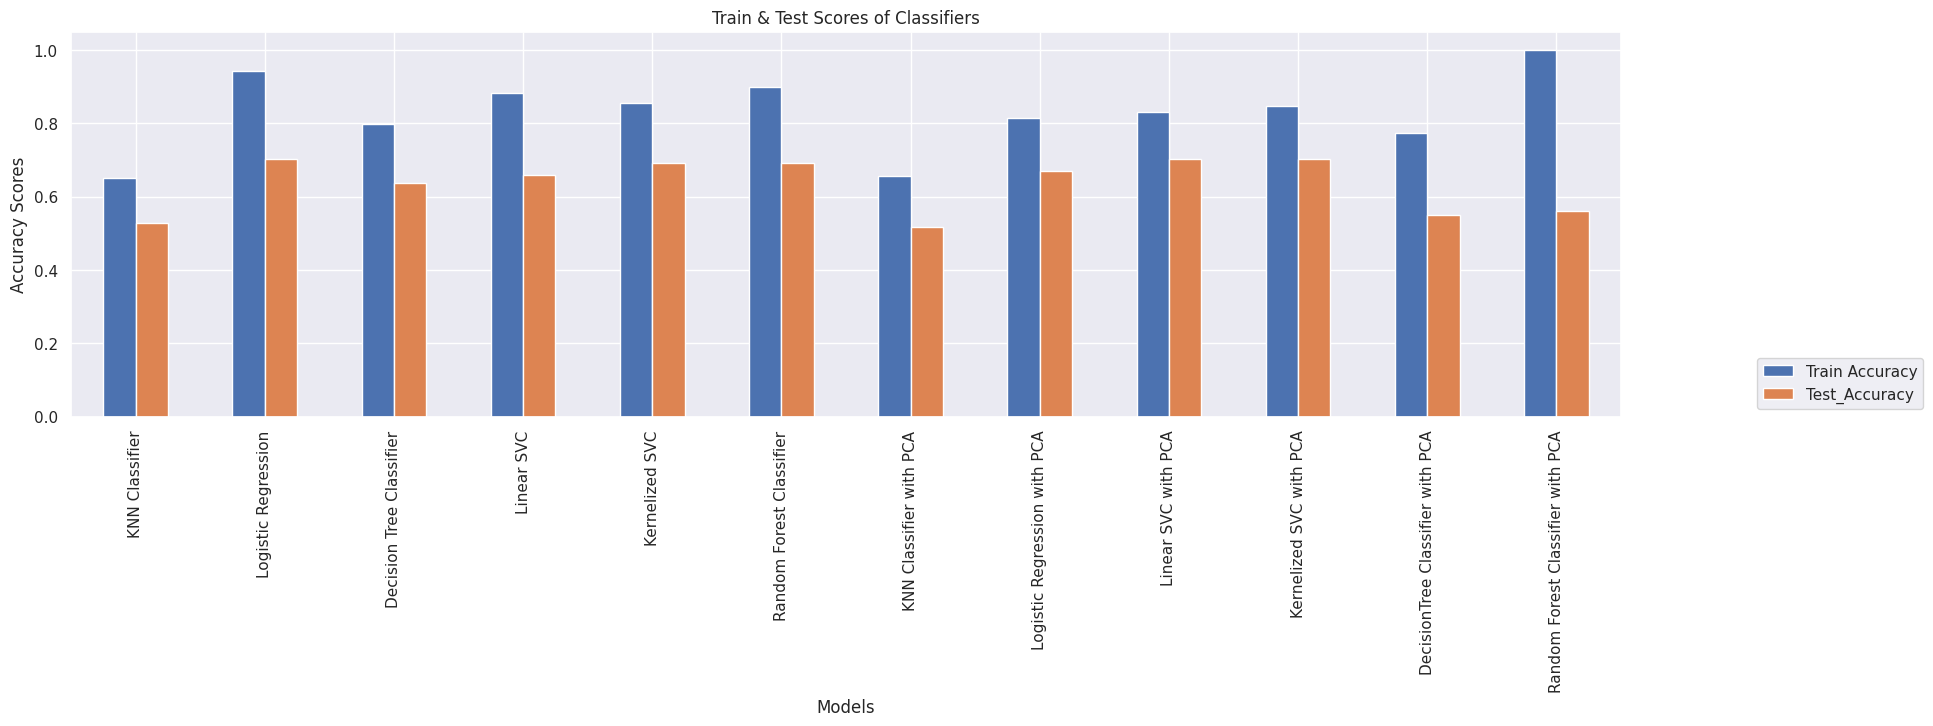

In [98]:
ax=result.plot(kind="bar",figsize=(20,5))
ax.set_xticks(result.index)
ax.set_xticklabels(result.Model,rotation=90)
plt.title('Train & Test Scores of Classifiers')
plt.xlabel('Models')
plt.ylabel('Accuracy Scores')
plt.legend(loc=4 , bbox_to_anchor=(1.2, 0))
plt.show()

The models started performing better after we applied PCA on the resampled data. The reason behind this is, PCA reduces the complexity of the data. It creates components based on giving importance to variables with large variance and also the components which it creates are non collinear in nature which means it takes care of collinearity in large data set. PCA also improves the overall execution time and quality of the models and it is very beneficial when we are working with huge amount of variables.

The Best model in term of recall score is Kernalized SVM with PCA having accuracy of 70.32%.